# Opening, closing, reading, and writing to files

This notebook will introduce the idea of loading, reading, and writing to files in Python.

Manipulating files in python is typically a two step process. We first use `open` to create a "file handle". This gives us a variable that we can then use to access the file.

When we are done with the file, we can use `close` to close it.

In [ ]:
f = open('./test.txt', 'w') # The 'w' string says that we are opening this file to write

In [ ]:
f.write('Hello, world\n') # The \n is the newline character
f.write('How are you?\n')
f.writelines(['Line 3\n', 'Line 4\n'])

In [ ]:
f.close()

In [ ]:
# Now that it's closed, writing won't work any more
f.write('test')

The one problem with that approach is that we have to remember to close the file. By using `with` we avoid this and the file closes automatically. This code does the same thing as above:

In [ ]:
with open('./test.txt', 'w') as f:
    f.write('Hello, world\n')
    f.write('How are you?\n')
    f.writelines(['Line 3\n', 'Line 4\n'])

We do a similar operation to read a file

In [ ]:
with open('./test.txt', 'r') as f: # The 'r' is to open for reading
    for line in f.readlines():
        print(line)

## Libraries that make reading and writing easier

It is rare that we will operate on files this directly; the `csv` module helps when reading and writing csv files, and `pandas`, which we will come to soon, does a great job of making reading and writing to files simple.

In [1]:
# CSV example
import csv
import random

with open('./csv_test.csv', 'w') as fh:
    f = csv.writer(fh)
    f.writerow(['Y', 'X1'])
    for i in range(10):
        x1 = random.random()
        y = x1 + random.random()
        f.writerow([y,x1])

In [2]:
with open('csv_test.csv', 'r') as fh:
    f = csv.reader(fh)
    header = next(f)
    for row in f:
        if not row:
            continue
        else:
            print(f"Y = {row[0]} and X = {row[1]}")

Y = 1.8976183787785939 and X = 0.9487541660218729
Y = 1.3734227886144525 and X = 0.5752324033206012
Y = 0.2912668344650019 and X = 0.22517597897918407
Y = 1.1828483185208836 and X = 0.3092203428613909
Y = 0.6256542713802391 and X = 0.5473927875849343
Y = 0.9135907324381025 and X = 0.2150186009881746
Y = 0.9213683326477987 and X = 0.359400944972571
Y = 0.5937718338291528 and X = 0.3254902048513829
Y = 1.1173785682523223 and X = 0.9025364778444401
Y = 0.49307555814565984 and X = 0.4717461320562556


<AxesSubplot:xlabel='X1', ylabel='Y'>

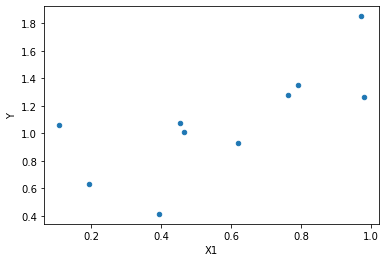

In [1]:
## Pandas example; going from raw data to a plot in two lines

import pandas as pd
import seaborn as sns

df = pd.read_csv('csv_test.csv')
df.plot.scatter(x = 'X1', y = 'Y')

# Day 4 - Chapter 8
## Exercise 1
### Write a program to read through a file and print the contents of the file (line by line) all in upper case.

In [1]:
fname = input('Enter the file name: ')
try:
    fhand = open(fname, 'r')
except:
    print('File cannot be opened:', fname)
for line in fhand:
    print(line.upper())
fhand.close()

Enter the file name: a
File cannot be opened: a


NameError: name 'fhand' is not defined

## Exercise 2
### Write a program to prompt for a file name, and then read through the file and look for lines of the form:

X-DSPAM-Confidence: 0.8475

### When you encounter a line that starts with “X-DSPAM-Confidence:” pull apart the line to extract the floating-point number on the line. Count these lines and then compute the total of the spam confidence values from these lines. When you reach the end of the file, print out the average spam confidence.

In [2]:
fname = input('Enter the file name: ')
try:
    fhand = open(fname, 'r')
except:
    print('File cannot be opened:', fname)
number = 0
nlines = 0
for line in fhand:
    if line.startswith("X-DSPAM-Confidence:"):
        colon = line.find(':')
        number = number + float(line[colon + 2:])
        nlines = nlines + 1
fhand.close()
ave_spam = number / nlines
print(f"Average spam confidence: {ave_spam}")

Enter the file name: mbox.txt
Average spam confidence: 0.8941280467445736


## Exercise 3
### Sometimes when programmers get bored or want to have a bit of fun, they add a harmless Easter Egg to their program. Modify the program that prompts the user for the file name so that it prints a funny message when the user types in the exact file name “na na boo boo”. The program should behave normally for all other files which exist and don’t exist.

In [1]:
fname = input('Enter the file name: ')
try:
    if fname == "na na boo boo":
        print("NA NA BOO BOO TO YOU - You have been punk'd!")
    else:
        fhand = open(fname, 'r')
        count = 0
        for line in fhand:
            if line.startswith("Subject:"):
                count = count + 1
        print('There were', count, 'subject lines in', fname)
        fhand.close()
except:
    print('File cannot be opened:', fname)
    exit()

Enter the file name: mbox-short.txt
There were 27 subject lines in mbox-short.txt
